In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
xs = np.random.uniform(-10,10,(1000,1))
zs = np.random.uniform(-10,10,(1000,1))
noise = np.random.uniform(-1,1,(1000,1))

In [5]:
inputs = np.column_stack((xs,zs))
targets = 2*xs-3*zs+5+noise

In [6]:
np.savez('tf_intro',inputs1 = inputs,targets1 = targets)

In [7]:
train_data = np.load('tf_intro.npz')

In [8]:
input_size = 2
output_size=1


In [51]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size,
                             kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                             bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
        
])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate= 0.02)
model.compile(optimizer = custom_optimizer,loss = 'mean_squared_error')
model.fit(train_data['inputs1'],train_data['targets1'],epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 589us/step - loss: 42.8940
Epoch 2/100
32/32 [==============================] - 0s 576us/step - loss: 1.1810
Epoch 3/100
32/32 [==============================] - 0s 611us/step - loss: 0.4566
Epoch 4/100
32/32 [==============================] - 0s 643us/step - loss: 0.3807
Epoch 5/100
32/32 [==============================] - 0s 610us/step - loss: 0.3707
Epoch 6/100
32/32 [==============================] - 0s 676us/step - loss: 0.4406
Epoch 7/100
32/32 [==============================] - 0s 579us/step - loss: 0.4555
Epoch 8/100
32/32 [==============================] - 0s 632us/step - loss: 0.4068
Epoch 9/100
32/32 [==============================] - 0s 611us/step - loss: 0.3783
Epoch 10/100
32/32 [==============================] - 0s 611us/step - loss: 0.3862
Epoch 11/100
32/32 [==============================] - 0s 602us/step - loss: 0.4136
Epoch 12/100
32/32 [==============================] - 0s 565us/step - loss: 0.3919
Epoch 13/100

In [52]:
model.layers[0].get_weights()

[array([[ 2.0519698],
        [-3.0518024]], dtype=float32),
 array([4.984783], dtype=float32)]

In [53]:
weights1 = model.layers[0].get_weights()[0]
bias1 = model.layers[0].get_weights()[1]

In [54]:
summ = pd.DataFrame(weights1)
summ1 = pd.DataFrame(bias1)

In [55]:
summ.columns = ['Weights']
summ1.columns = ['Bias']
summ

,Weights
0,2.051970
1,-3.051802


In [61]:
summ1

,Bias
0,4.984783


In [71]:
predicted_values = model.predict_on_batch(train_data['inputs1']).round(1)
predicted_values

array([[ 18.5],
       [ -4.8],
       [ 30.6],
       [-12.5],
       [  0.2],
       [  3.2],
       [ 20.3],
       [ 25.3],
       [ -3.4],
       [  4. ],
       [  8.7],
       [ 33.3],
       [-13.7],
       [ 38.5],
       [  4.3],
       [ -5.1],
       [ 17.5],
       [-15.6],
       [-35.7],
       [-10.2],
       [ -2.1],
       [-16.9],
       [-11.4],
       [ 13.4],
       [  4.6],
       [ 20.8],
       [ -4.3],
       [ 28.1],
       [-36.5],
       [-13.4],
       [ 37.5],
       [ 29.4],
       [-30. ],
       [  9. ],
       [ 37.3],
       [-24.4],
       [ -6.5],
       [ 11.1],
       [ 24.3],
       [  8.1],
       [ 16.2],
       [ -8.6],
       [  8.9],
       [-10.5],
       [-39.7],
       [-28.5],
       [-38.3],
       [-14.4],
       [  2.3],
       [-21.1],
       [ -2.9],
       [ 18.5],
       [  7.1],
       [-26.1],
       [  2.6],
       [-13.4],
       [ 28.5],
       [-33.4],
       [  3.1],
       [-26.1],
       [ 26.2],
       [-36. ],
       [

In [72]:
actual_values = train_data['targets1'].round(1)
actual_values

array([[ 18. ],
       [ -5.2],
       [ 30.5],
       [-12.6],
       [  1.2],
       [  3.6],
       [ 19.4],
       [ 24.7],
       [ -3.3],
       [  3.9],
       [  8.7],
       [ 33.4],
       [-13.3],
       [ 38.7],
       [  3.4],
       [ -5.8],
       [ 17.7],
       [-15.3],
       [-34.9],
       [-10.4],
       [ -1.2],
       [-17.2],
       [-10.2],
       [ 12.4],
       [  5. ],
       [ 19.5],
       [ -3.8],
       [ 27.7],
       [-35.9],
       [-12.4],
       [ 36.8],
       [ 29.4],
       [-29.8],
       [  8.7],
       [ 36.5],
       [-24.6],
       [ -7.2],
       [ 11.9],
       [ 23.5],
       [  7.7],
       [ 17. ],
       [ -7.9],
       [  9.5],
       [ -9.2],
       [-38.9],
       [-28.1],
       [-37. ],
       [-13.2],
       [  1.9],
       [-21.3],
       [ -2.3],
       [ 18. ],
       [  7.8],
       [-26. ],
       [  2.3],
       [-13.4],
       [ 27.7],
       [-32.6],
       [  3.8],
       [-25.5],
       [ 25.9],
       [-34.3],
       [

In [67]:
Final = pd.DataFrame(predicted_values)
Final.columns = ['Predicted values']
Final

,Predicted values
0,18.5
1,-4.8
2,30.6
3,-12.5
4,0.2
...,...
995,2.4
996,22.1
997,-10.5
998,15.9


In [68]:
Final1 = pd.DataFrame(actual_values)
Final1.columns = ['Actual values']
Final1

,Actual values
0,18.0
1,-5.2
2,30.5
3,-12.6
4,1.2
...,...
995,1.6
996,22.2
997,-9.3
998,15.6


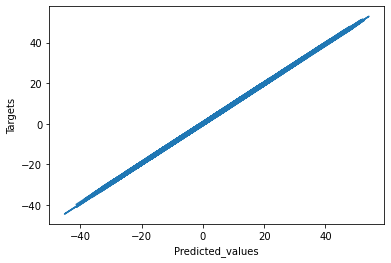

In [59]:
plt.plot(np.squeeze(model.predict_on_batch(train_data['inputs1'])),np.squeeze(train_data['targets1']))
plt.xlabel('Predicted_values')
plt.ylabel('Targets')
plt.show()